In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [4]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [6]:
unique_count = df['place'].nunique()
print(unique_count)

42


In [7]:
unique_count = books['place'].nunique()
print(unique_count)

43


In [8]:
unique_count = df['place'].unique()
print(unique_count)

['Leipzig' 'Ferrara' 'Venice' 'Cologne' 'Paris' 'Alcalá de Henares'
 'Vienna' 'Ingolstadt' 'Milan' 'Wittenberg' 'Antwerp' 'Lyon' 'Dijon'
 'Florence' 'Basel' 'Perugia' 'Lisbon' 'Mainz' 'London' 'Saint Gervais'
 'Rome' 'Geneva' 'Frankfurt (Main)' 'Seville' 'Bologna' 'Nuremberg'
 'Padua' 'Leuven' 'Leiden' 'Sine loco' 'Coimbra' 'Kraków' 'Strasbourg'
 'Heidelberg' 'Valladolid' 'Neustadt an der Weinstraße' 'Siena'
 'Salamanca' 'Madrid' 'Lemgo' 'Avignon' 'Mexico City']


In [9]:
# Group by 'place' and count unique values for 'book' and 'images'
unique_counts = df.groupby('place').agg(
    unique_books=('book', 'nunique'),
    unique_images=('images', 'nunique')
).reset_index()

print(unique_counts)

                         place  unique_books  unique_images
0            Alcalá de Henares             1             27
1                      Antwerp            22            911
2                      Avignon             1             39
3                        Basel             2            208
4                      Bologna             1             11
5                      Coimbra             1             62
6                      Cologne            15            758
7                        Dijon             2             21
8                      Ferrara             1             10
9                     Florence             3            136
10            Frankfurt (Main)            13             71
11                      Geneva             1            124
12                  Heidelberg             1            124
13                  Ingolstadt             1             43
14                      Kraków             3             56
15                      Leiden          

In [10]:
# Assuming df is your DataFrame and it contains 'book', 'images', 'place', and 'year' columns

# Convert 'year' column to integer (if not already in int format)
df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

# Group by 'place' and calculate unique books, unique images, and the year range
unique_counts = df.groupby('place').agg(
    unique_books=('book', 'nunique'),
    unique_images=('images', 'nunique'),
    min_year=('year', 'min'),
    max_year=('year', 'max')
).reset_index()

# Optionally, you can add a 'year_range' column
unique_counts['year_range'] = unique_counts['min_year'].astype(str) + ' - ' + unique_counts['max_year'].astype(str)

# Drop the 'min_year' and 'max_year' columns if you only want the 'year_range'
unique_counts = unique_counts.drop(columns=['min_year', 'max_year'])

print(unique_counts)

                         place  unique_books  unique_images   year_range
0            Alcalá de Henares             1             27  1526 - 1526
1                      Antwerp            22            911  1543 - 1593
2                      Avignon             1             39  1520 - 1520
3                        Basel             2            208  1568 - 1569
4                      Bologna             1             11  1480 - 1480
5                      Coimbra             1             62  1593 - 1593
6                      Cologne            15            758  1500 - 1610
7                        Dijon             2             21  1619 - 1633
8                      Ferrara             1             10  1472 - 1472
9                     Florence             3            136  1550 - 1579
10            Frankfurt (Main)            13             71  1549 - 1600
11                      Geneva             1            124  1607 - 1607
12                  Heidelberg             1       

In [11]:
# Assuming df is your DataFrame and it contains 'book', 'images', 'place', and 'year' columns

# Convert 'year' column to integer (if not already in int format)
df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

# Group by 'place' and calculate unique books, unique images, and the year range
unique_counts = df.groupby('place').agg(
    unique_books=('book', 'nunique'),
    unique_images=('images', 'nunique'),
    min_year=('year', 'min'),
    max_year=('year', 'max')
).reset_index()

# Calculate the number of years in the year range
unique_counts['years_in_range'] = unique_counts['max_year'] - unique_counts['min_year'] + 1

# Optionally, you can add a 'year_range' column
unique_counts['year_range'] = unique_counts['min_year'].astype(str) + ' - ' + unique_counts['max_year'].astype(str)

# Drop the 'min_year' and 'max_year' columns if you only want the 'year_range'
unique_counts = unique_counts.drop(columns=['min_year', 'max_year'])

# Print the result
print(unique_counts)


                         place  unique_books  unique_images  years_in_range  \
0            Alcalá de Henares             1             27               1   
1                      Antwerp            22            911              51   
2                      Avignon             1             39               1   
3                        Basel             2            208               2   
4                      Bologna             1             11               1   
5                      Coimbra             1             62               1   
6                      Cologne            15            758             111   
7                        Dijon             2             21              15   
8                      Ferrara             1             10               1   
9                     Florence             3            136              30   
10            Frankfurt (Main)            13             71              52   
11                      Geneva             1        

In [13]:
# Sort by the number of books or images
sorted_books = unique_counts.sort_values(by='unique_books', ascending=False)
sorted_images = unique_counts.sort_values(by='unique_images', ascending=False)

# Display the top places with the most books and images
print(sorted_books[['place', 'unique_books']].head())
print(sorted_images[['place', 'unique_images']].head())


         place  unique_books
39      Venice            68
29       Paris            68
41  Wittenberg            48
1      Antwerp            22
16     Leipzig            19
         place  unique_images
39      Venice           6285
29       Paris           3331
41  Wittenberg           2719
21        Lyon           2175
1      Antwerp            911


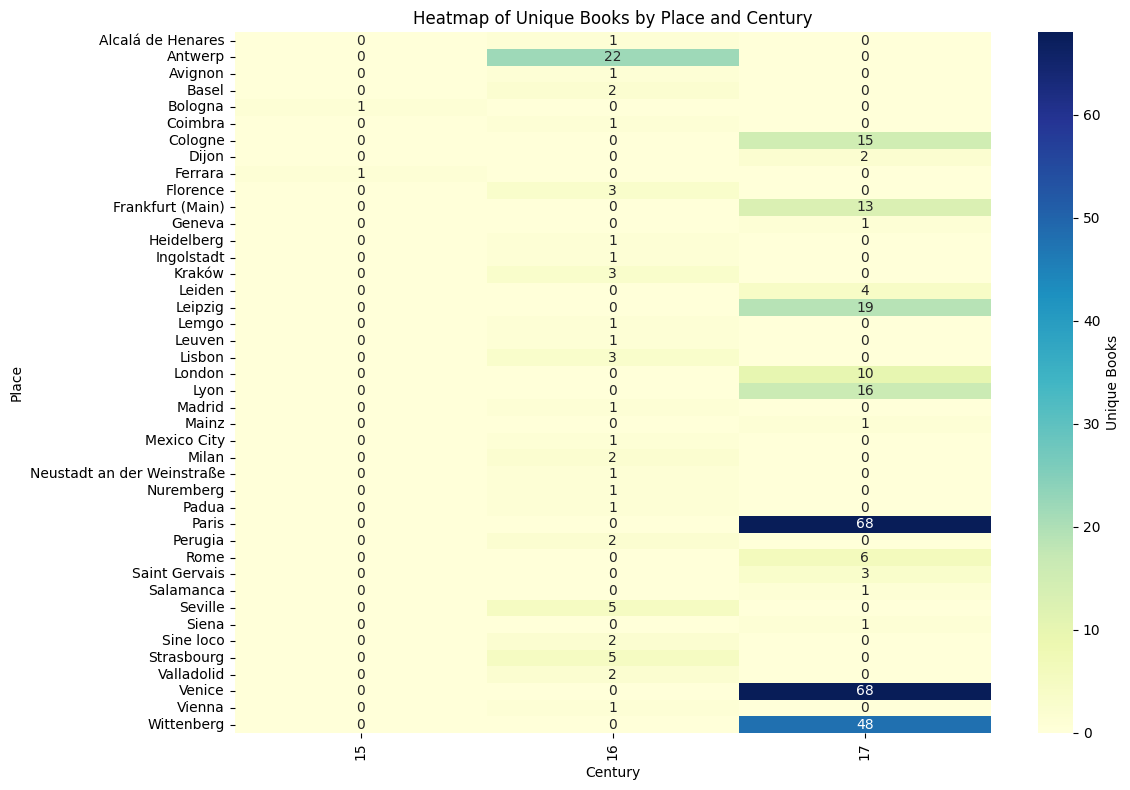

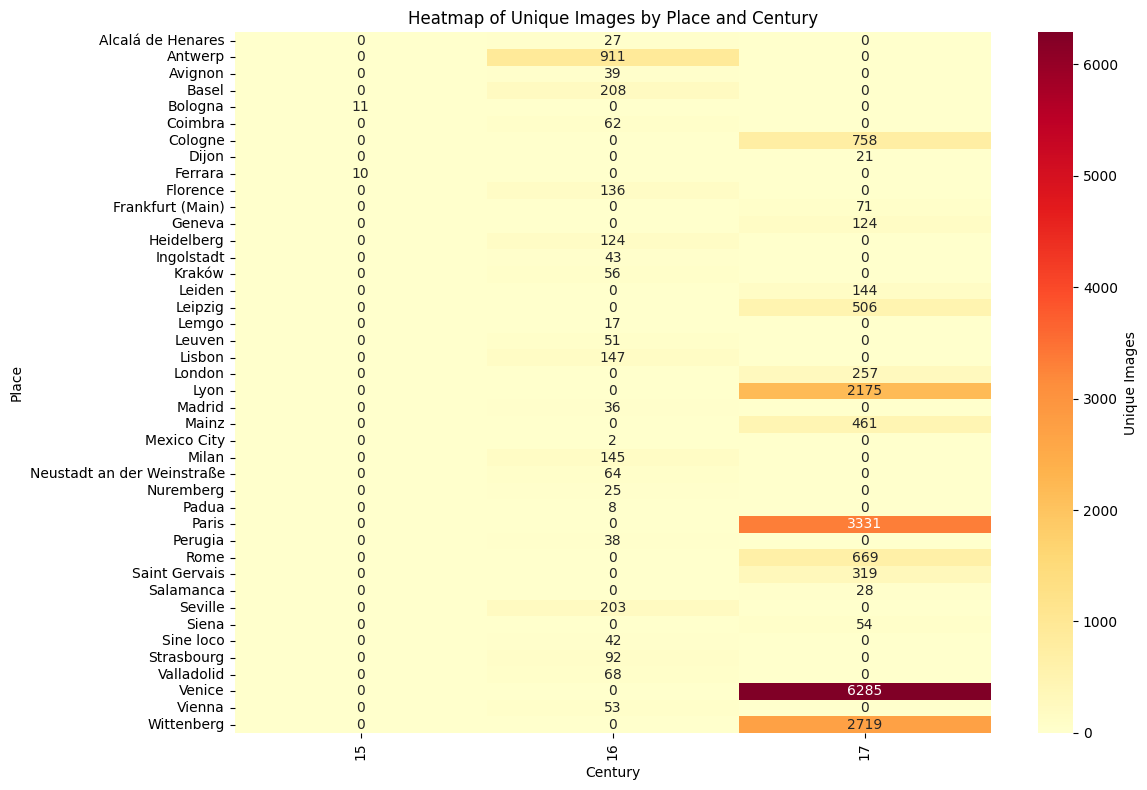

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
# Assuming your DataFrame is named df and contains columns: 'year', 'place', 'book', and 'images'

# Step 1: Ensure 'year' column is numeric (integer type)
df['year'] = pd.to_numeric(df['year'], errors='coerce', downcast='integer')

# Step 2: Group by 'place' and 'year', and calculate unique counts for 'book' and 'images'
unique_counts = df.groupby(['place', 'year'])[['book', 'images']].nunique().reset_index()

# Step 3: Calculate the max and min years per place to find the century
max_year_per_place = df.groupby('place')['year'].max().reset_index()
max_year_per_place['century'] = (max_year_per_place['year'] // 100) + 1

# Step 4: Merge unique_counts with max_year_per_place to get the century
unique_counts = pd.merge(unique_counts, max_year_per_place[['place', 'century']], on='place', how='left')

# Step 5: Pivot the data to create a table with places as rows and centuries as columns
pivot_books = unique_counts.groupby(['place', 'century'])['book'].sum().unstack(fill_value=0)
pivot_images = unique_counts.groupby(['place', 'century'])['images'].sum().unstack(fill_value=0)

# Step 6: Create heatmap for books
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_books, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Unique Books'})
plt.title('Heatmap of Unique Books by Place and Century')
plt.xlabel('Century')
plt.ylabel('Place')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Step 7: Create heatmap for images
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_images, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Unique Images'})
plt.title('Heatmap of Unique Images by Place and Century')
plt.xlabel('Century')
plt.ylabel('Place')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [19]:
# Filter the dataframe to check for books printed in the 15th century (1400-1499)
books_15th_century = df[df['year'].between(1400, 1499)]

# Count the number of unique books in the 15th century
books_15th_century_count = books_15th_century['book'].nunique()
print(f"Number of unique books printed in the 15th century: {books_15th_century_count}")


Number of unique books printed in the 15th century: 27


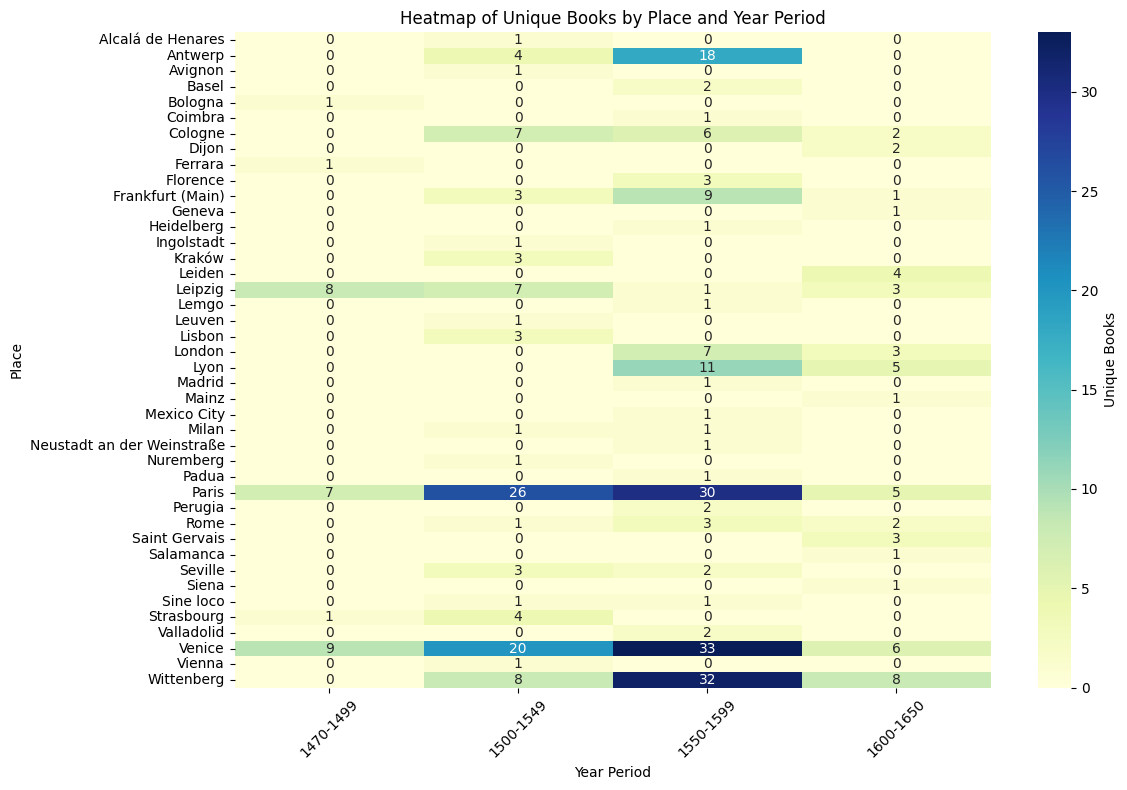

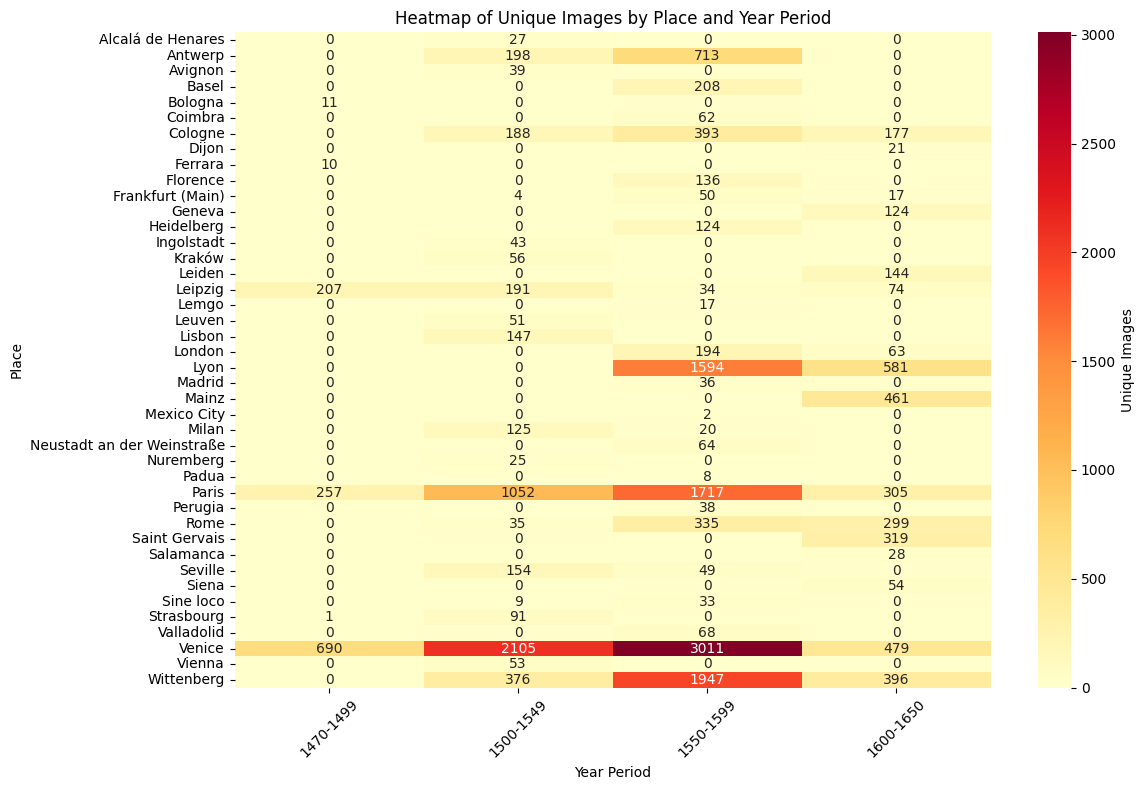

In [28]:

# Assuming your DataFrame is called `df` and already contains the relevant columns

# Step 1: Convert the 'year' column to integers if it's not already
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 2: Define custom year intervals and labels based on your requested ranges
bins = [1470, 1499, 1549, 1599, 1650]  # Custom year intervals
labels = ['1470-1499', '1500-1549', '1550-1599', '1600-1650']  # Labels for each period

# Step 3: Create a new column 'year_period' to categorize each year into custom intervals
df['year_period'] = pd.cut(df['year'], bins=bins, labels=labels, right=True)

# Step 4: Group by 'place' and 'year_period' and count unique books and images
unique_counts = df.groupby(['place', 'year_period'], observed=True)[['book', 'images']].nunique().reset_index()

# Step 5: Pivot the data for books and images for the heatmap
pivot_books = unique_counts.groupby(['place', 'year_period'], observed=True)['book'].sum().unstack(fill_value=0)
pivot_images = unique_counts.groupby(['place', 'year_period'], observed=True)['images'].sum().unstack(fill_value=0)

# Step 6: Create heatmap for books
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_books, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Unique Books'})
plt.title('Heatmap of Unique Books by Place and Year Period')
plt.xlabel('Year Period')
plt.ylabel('Place')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Step 7: Create heatmap for images
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_images, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Unique Images'})
plt.title('Heatmap of Unique Images by Place and Year Period')
plt.xlabel('Year Period')
plt.ylabel('Place')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()


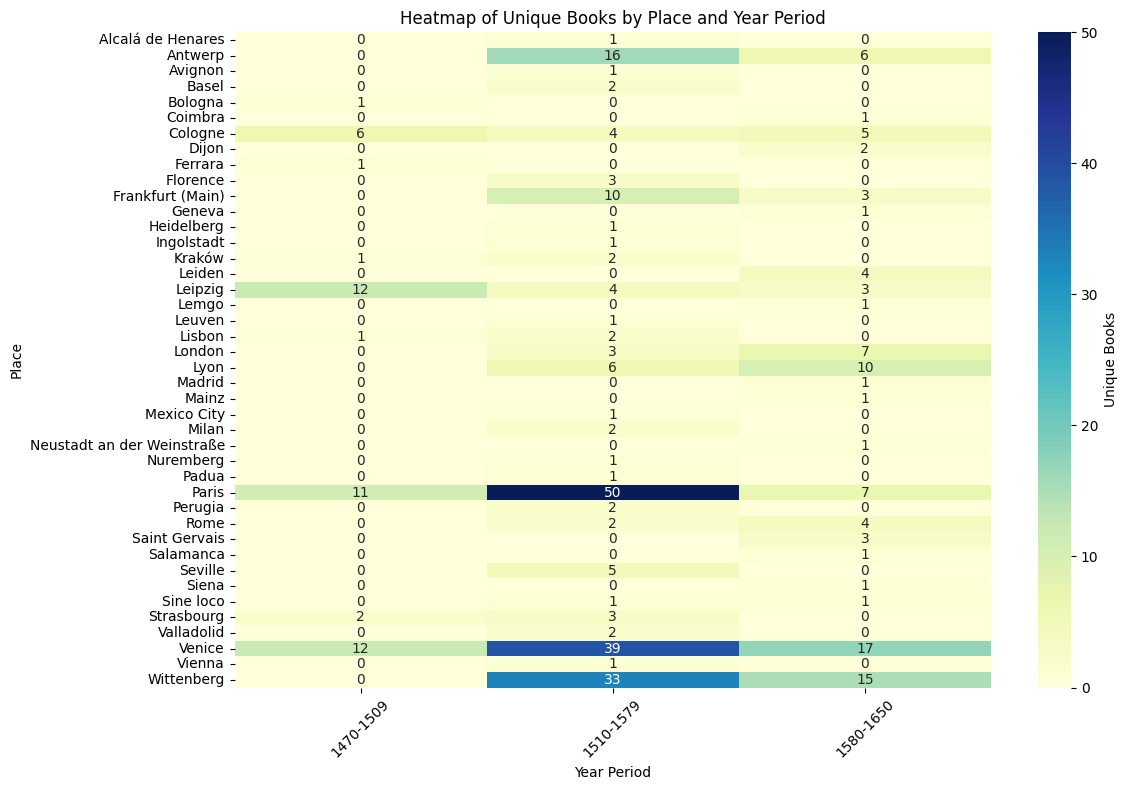

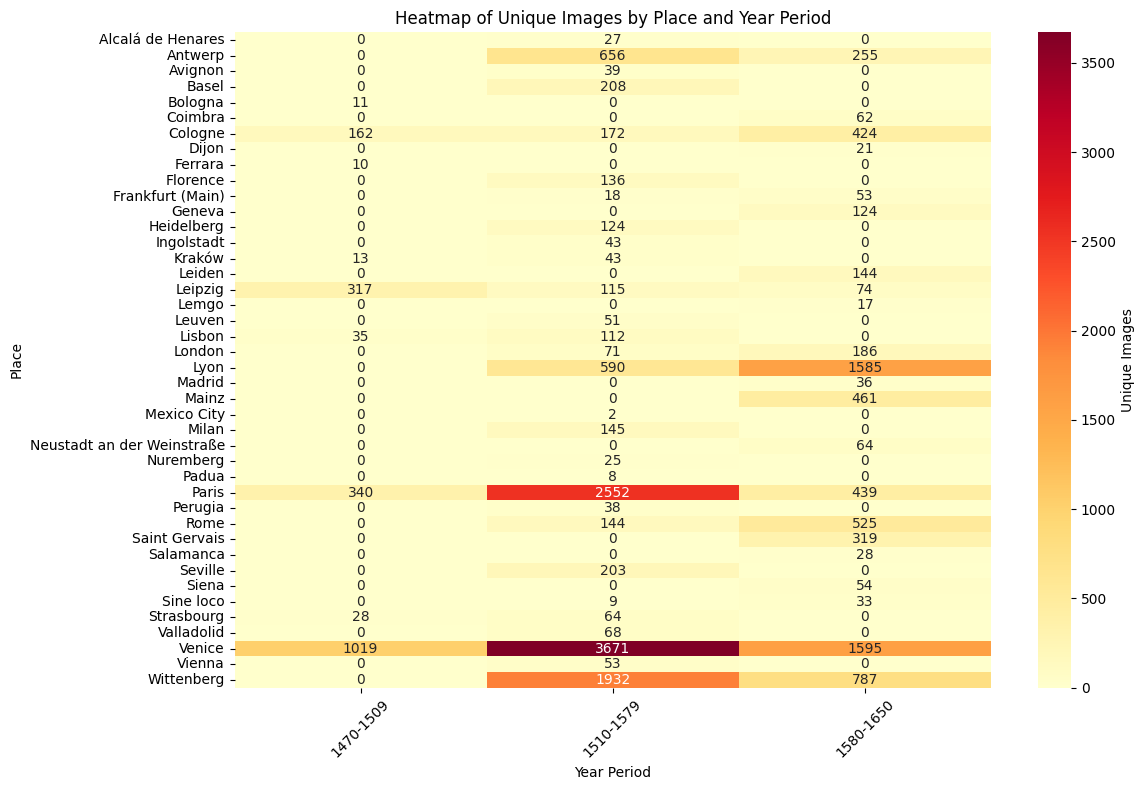

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called `df` and already contains the relevant columns

# Step 1: Convert the 'year' column to integers if it's not already
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 2: Define custom year intervals and labels based on your requested ranges
bins = [1470, 1509, 1579, 1650]  # Custom year intervals
labels = ['1470-1509', '1510-1579', '1580-1650']  # Labels for each period

# Step 3: Create a new column 'year_period' to categorize each year into custom intervals
df['year_period'] = pd.cut(df['year'], bins=bins, labels=labels, right=True)

# Step 4: Group by 'place' and 'year_period' and count unique books and images
unique_counts = df.groupby(['place', 'year_period'], observed=True)[['book', 'images']].nunique().reset_index()

# Step 5: Pivot the data for books and images for the heatmap
pivot_books = unique_counts.groupby(['place', 'year_period'], observed=True)['book'].sum().unstack(fill_value=0)
pivot_images = unique_counts.groupby(['place', 'year_period'], observed=True)['images'].sum().unstack(fill_value=0)

# Step 6: Create heatmap for books
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_books, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Unique Books'})
plt.title('Heatmap of Unique Books by Place and Year Period')
plt.xlabel('Year Period')
plt.ylabel('Place')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

# Step 7: Create heatmap for images
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_images, cmap='YlOrRd', annot=True, fmt='d', cbar_kws={'label': 'Unique Images'})
plt.title('Heatmap of Unique Images by Place and Year Period')
plt.xlabel('Year Period')
plt.ylabel('Place')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()
plt.show()


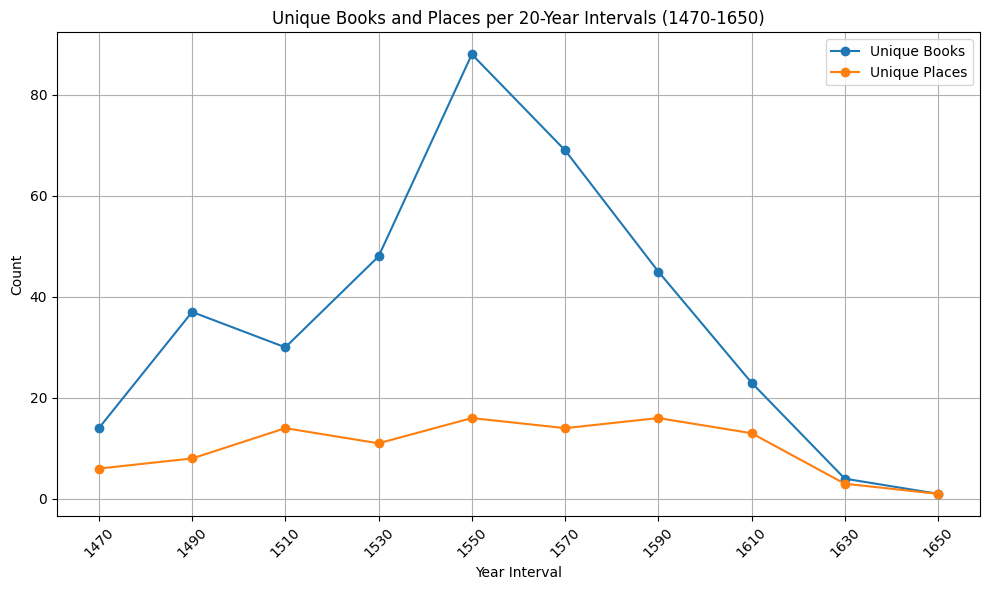

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'books'
# Convert 'year' column to int (if it's not already)
books['year'] = books['year'].astype(int)

# Filter the books dataframe to include only years between 1470 and 1650
#books_filtered = books[(books['year'] >= 1470) & (books['year'] <= 1650)]

# Create a new column for the 20-year intervals
books_filtered['interval'] = (books_filtered['year'] - 1470) // 20 * 20 + 1470

# Group by the 20-year intervals and calculate the number of unique books and places
summary = books_filtered.groupby('interval').agg(
    unique_books=('book', 'nunique'),
    unique_places=('place', 'nunique')
).reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(summary['interval'], summary['unique_books'], label='Unique Books', marker='o')
plt.plot(summary['interval'], summary['unique_places'], label='Unique Places', marker='o')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Unique Books and Places per 20-Year Intervals (1470-1650)')
plt.legend()
plt.grid(True)
plt.xticks(summary['interval'], rotation=45)
plt.tight_layout()
plt.show()


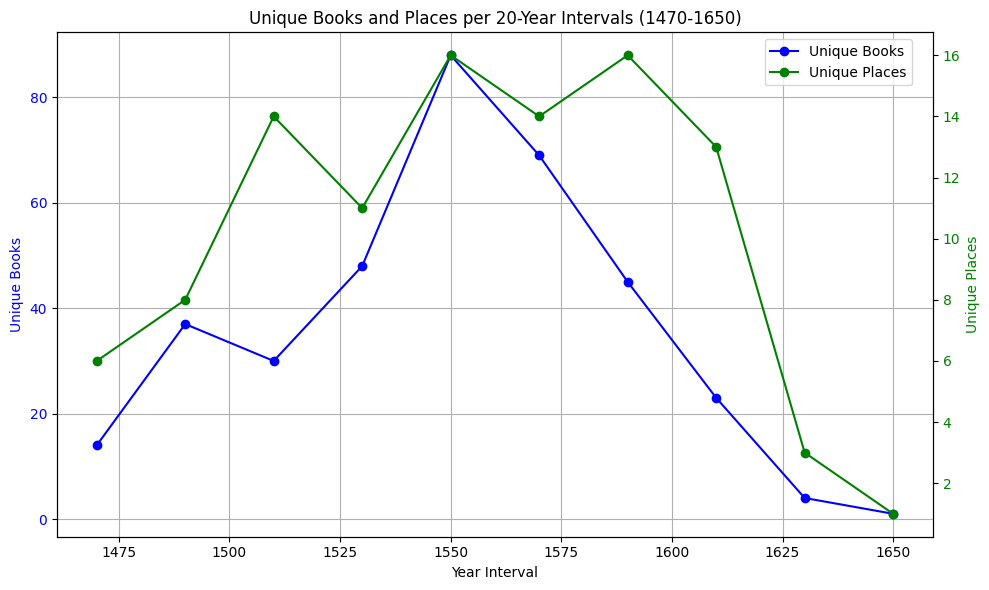

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'books'
# Convert 'year' column to int (if it's not already)
books['year'] = books['year'].astype(int)

# Filter the books dataframe to include only years between 1470 and 1650
books_filtered = books[(books['year'] >= 1470) & (books['year'] <= 1650)]

# Create a new column for the 20-year intervals
books_filtered['interval'] = (books_filtered['year'] - 1470) // 20 * 20 + 1470

# Group by the 20-year intervals and calculate the number of unique books and places
summary = books_filtered.groupby('interval').agg(
    unique_books=('book', 'nunique'),
    unique_places=('place', 'nunique')
).reset_index()

# Plot the results with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot unique_books on the primary y-axis
ax1.plot(summary['interval'], summary['unique_books'], label='Unique Books', marker='o', color='b')
ax1.set_xlabel('Year Interval')
ax1.set_ylabel('Unique Books', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for unique_places
ax2 = ax1.twinx()
ax2.plot(summary['interval'], summary['unique_places'], label='Unique Places', marker='o', color='g')
ax2.set_ylabel('Unique Places', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Title and grid
plt.title('Unique Books and Places per 20-Year Intervals (1470-1650)')
ax1.grid(True)

# Legend
fig.legend(loc='upper left', bbox_to_anchor=(0.8, 1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.show()


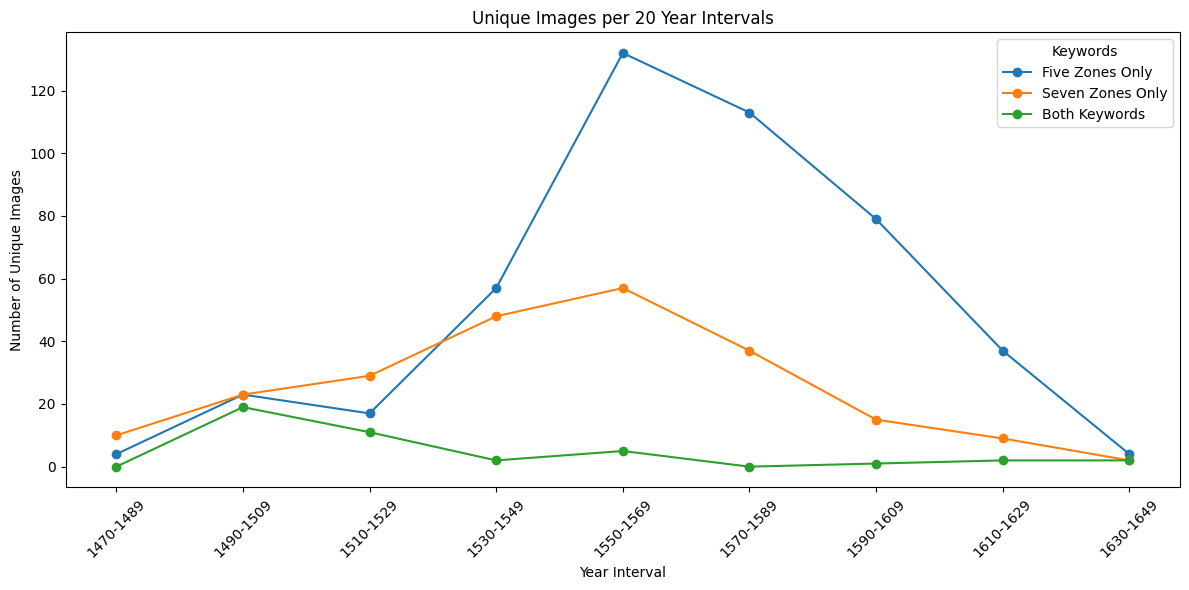

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the dataframe is named df
# Step 1: Convert year to integer
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Step 2: Create bins for the 20-year intervals between 1470 and 1650
bins = range(1470, 1660, 20)
labels = [f"{start}-{start + 19}" for start in bins[:-1]]
df['year_group'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Step 3: Define filters based on cks column
df['has_ck_five_zones_only'] = df['cks'].str.contains('CK_Five Zones') & ~df['cks'].str.contains('CK_Seven Climate Zones')
df['has_ck_seven_zones_only'] = df['cks'].str.contains('CK_Seven Climate Zones') & ~df['cks'].str.contains('CK_Five Zones')
df['has_both_keywords'] = df['cks'].str.contains('CK_Five Zones') & df['cks'].str.contains('CK_Seven Climate Zones')

# Step 4: Count unique images based on conditions for each interval
image_counts = pd.DataFrame({
    'Five Zones Only': df[df['has_ck_five_zones_only']].groupby('year_group', observed=False)['images'].nunique(),
    'Seven Zones Only': df[df['has_ck_seven_zones_only']].groupby('year_group', observed=False)['images'].nunique(),
    'Both Keywords': df[df['has_both_keywords']].groupby('year_group', observed=False)['images'].nunique()
})

# Step 5: Plot the results as a line graph, set the figure size here
ax = image_counts.plot(kind='line', marker='o', figsize=(12, 6))  # Set figsize directly here

# Add titles and labels
ax.set_title('Unique Images per 20 Year Intervals')
ax.set_xlabel('Year Interval')
ax.set_ylabel('Number of Unique Images')
plt.xticks(rotation=45)
plt.legend(title="Keywords")
plt.tight_layout()
plt.show()
